# Healing book 추천 서비스

## 1) 데이터 정리 - 10개의 대표 힐링 키워드가 들어있는 책 가져오기

In [2]:
import pandas as pd
import numpy as np

In [3]:
check = pd.read_csv('./data/final/mbti/new_final.csv', encoding = 'utf-8')

In [4]:
check.head(2)

,title,author,publisher,isbn,keyword,image
0,트렌드 코리아 2020,"김난도, 전미영, 최지혜, 이향은, 이준영, 김서영, 이수진, 서유현, 권정윤 (지...",미래의창,9788959896127,"['경제전망', '소비자', '페르소나', '소비', '마우스', '밀레']",https://image.aladin.co.kr/product/21094/63/co...
1,린치핀,"세스 고딘 (지은이), 윤영삼 (옮긴이)",라이스메이커,9791185392998,"['자기관리', '크리에이터', '인공지능', '사업 모델', '톱니바퀴', '예술가']",https://image.aladin.co.kr/product/22213/37/co...


In [5]:
check.shape

(9477, 6)

In [6]:
# 단어 리스트 만들기
def make_list(df) :
    keyword_list = []

    for i in range(len(df)):
        temp = []
        
        for j in range(len(df['keyword'][i].split('\''))):
            if j % 2 == 1:
                temp.append(df['keyword'][i].split('\'')[j])
        keyword_list.append(temp)
    
    return keyword_list

In [7]:
check['keyword'] = make_list(check)

In [8]:
check.head(2)

,title,author,publisher,isbn,keyword,image
0,트렌드 코리아 2020,"김난도, 전미영, 최지혜, 이향은, 이준영, 김서영, 이수진, 서유현, 권정윤 (지...",미래의창,9788959896127,"[경제전망, 소비자, 페르소나, 소비, 마우스, 밀레]",https://image.aladin.co.kr/product/21094/63/co...
1,린치핀,"세스 고딘 (지은이), 윤영삼 (옮긴이)",라이스메이커,9791185392998,"[자기관리, 크리에이터, 인공지능, 사업 모델, 톱니바퀴, 예술가]",https://image.aladin.co.kr/product/22213/37/co...


In [9]:
# 대표 힐링 키워드
healing=['행복', '희망', '용기', '위로', '감동', '마음', '자유', '사랑', '힐링', '치유']

In [10]:
### 키워드 있는 책들 뽑아내기
df = pd.DataFrame(columns=['title','author','publisher','isbn','keyword','image'])

for i in range(len(check)):
    for j in range(len(check['keyword'][i])):
        for a in healing :
            if a in check['keyword'][i][j]:
                df.loc[i]=check.loc[i]
                break

In [11]:
df.head(3)

,title,author,publisher,isbn,keyword,image
143,파이어족이 온다,"스콧 리킨스 (지은이), 박은지 (옮긴이)",지식노마드,9791187481638,"[재테크, 경제, 라이프스타일, 행복, 자유, 저축]",https://image.aladin.co.kr/product/20780/79/co...
165,90년생 재테크!,월재연 슈퍼루키 10인 (지은이),진서원,9791186647363,"[재테크, 종잣돈, 투자가이드, 행복, 테크, 부동산 투자]",https://image.aladin.co.kr/product/22332/30/co...
182,죽은 경제학자의 살아있는 아이디어,"토드 부크홀츠 (지은이), 류현 (옮긴이), 한순구 (감수)",김영사,9788934935605,"[경제학, 케인스, 국부론, 마셜, 자유 무역, 애덤 스미스]",https://image.aladin.co.kr/product/456/15/cove...


In [12]:
df.shape

(2000, 6)

## 2) 책의 긍정 부정 점수를 부여하기 위한 책 서평 크롤링

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError

In [ ]:
# 오픈을 할때 예외처리를 통해 만약 오류가 생기면 원인을 알수 있게 함수 있음
try :
    html = urlopen('https://pythondojang.bitbucket.io/weather/observation/currentweather.html')
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import time

In [ ]:
isbn_list=list(df['isbn'])

In [ ]:
# 접근할 url 변수 생성
isbn_url = 'http://www.kyobobook.co.kr/product/detailViewKor.laf?ejkGb=KOR&mallGb=KOR&barcode='
rest_url = '&orderClick=LET&Kc='

In [ ]:
path = './driver/chromedriver.exe'
driver = webdriver.Chrome(path)

In [ ]:
next_review = []

for i in tqdm_notebook(range(len(isbn_list))) :
    url = isbn_url + str(isbn_list[i]) + rest_url
    driver.get(url)
    
    a_list = driver.find_elements_by_css_selector('div.box_detail_article')
    time.sleep(1.5)
    a_list = driver.find_elements_by_css_selector('div.box_detail_article')
    
    if len(a_list) > 0 :
        temp = a_list[len(a_list) - 1].find_elements_by_tag_name('a')
    else :
        next_review.append('')
        continue
    
    if len(temp) > 0 :
        if len(temp[0].text) > 0 :
            temp[0].click()
            
            new_a_list = driver.find_elements_by_css_selector('div.box_detail_article')
            book_review = new_a_list[len(new_a_list) - 1].text.replace('\n', '').replace('닫기', '')

            next_review.append(book_review)
        else :
            next_review.append('')
    else :
        next_review.append('')

In [ ]:
df['review'] = next_review

In [ ]:
# 크롤링 후 csv 생성
df.to_csv('./data/final/new_final_review_df.csv', mode = 'w', index = False, encoding = 'utf-8-sig')

# 3) 책 서평에 긍정 부정 점수 부여

In [13]:
healing = pd.read_csv('./data/final/new_final_review_df.csv',encoding='utf-8')

In [14]:
healing['review'].isnull().sum()

174

In [15]:
len(healing)

2000

In [16]:
healing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2000 non-null   object
 1   author     1999 non-null   object
 2   publisher  1998 non-null   object
 3   isbn       2000 non-null   int64 
 4   keyword    2000 non-null   object
 5   image      1996 non-null   object
 6   review     1826 non-null   object
dtypes: int64(1), object(6)
memory usage: 109.5+ KB


In [17]:
# review가 없는 결측치 제거
healing=healing.dropna(subset=['review'])

In [18]:
# index 정리
healing.reset_index(drop = True, inplace = True)

In [20]:
# 긍정부정 단어 데이터 불러오기
sense=pd.read_csv('./data/final/healing/NL_bo_sense_2019.csv',encoding='utf-8')

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
positive_score=[]
negative_score=[]

for number in tqdm_notebook(range(len(healing))):
    text=healing['review'][number].split('.')
    
    positive_check=[]
    negative_check=[]

    for a in range(len(text)):
        string=text[a]

        for i in range(len(sense)):
            if sense['term'][i] in string:
                positive_check.append(float(sense['positive_score'][i]))
                negative_check.append(float(sense['negative_score'][i]))
                
    positive_score.append(sum(positive_check))
    negative_score.append(sum(negative_check))  

In [ ]:
healing['positive_score']=positive_score
healing['negative_score']=negative_score

In [ ]:
# 책 제목을 기준으로 중복데이터 제거
healing_remove=healing.drop_duplicates(['title'])

In [ ]:
healing_remove.to_csv('./data/final/healing_remove.csv',index=False,encoding='utf-8-sig')

In [21]:
# 긍정부정 단어 데이터 불러오기
healing_remove=pd.read_csv('./data/final/healing/healing_remove.csv',encoding='utf-8')

In [22]:
healing_remove.head(2)

,title,author,publisher,isbn,keyword,image,review,positive_score,negative_score
0,파이어족이 온다,"스콧 리킨스 (지은이), 박은지 (옮긴이)",지식노마드,9791187481638,"['재테크', '경제', '라이프스타일', '행복', '자유', '저축']",https://image.aladin.co.kr/product/20780/79/co...,금융위기 이후 전 세계 젊은이들을 사로잡고 있는라이프스타일 혁명! - 파이어족이 온...,21.81884,16.01194
1,90년생 재테크!,월재연 슈퍼루키 10인 (지은이),진서원,9791186647363,"['재테크', '종잣돈', '투자가이드', '행복', '테크', '부동산 투자']",https://image.aladin.co.kr/product/22332/30/co...,스마트하고 기상천외한 90년생 재테크‘학자금대출이 까마득해요’ ‘저는 아직도 취업준...,6.25402,5.10247


## 4) WordClound를 통해 시각화 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import csv
from wordcloud import WordCloud, STOPWORDS

In [34]:
train = pd.read_csv('./data/final/healing/healing_remove_revised.csv')

In [35]:
# 단어 리스트 만들기 

def wordcloud(df) :
    
    keyword_list = []

    for i in range(len(df)):
        df['keyword'][i]
        for j in range(len(df['keyword'][i].split('\''))):
            if j % 2 == 1:
                keyword_list.append(df['keyword'][i].split('\'')[j])
    
    dic = {}

    for i in keyword_list :
        if i not in dic.keys() :
            dic[i] = 1
        else :
            dic[i] += 1

    heart=np.array(Image.open('./data/final/healing/heart.jpg'))
    font_path='c:/Windows/Fonts/malgun.ttf'
    
    wordcloud = WordCloud(
        font_path = font_path,
        width = 1000,
        height =1000,
        background_color="white",
        mask = heart,

    )

    wordcloud = wordcloud.generate_from_frequencies(dic)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

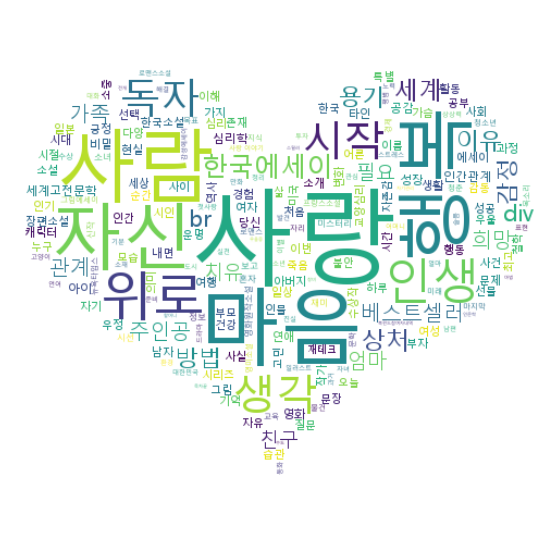

In [36]:
wordcloud(train)